# Regression Loss Functions

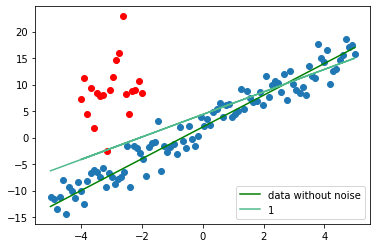

In [4]:
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline


def xPolynominalExtender(x,PolynominalOrder=1 ):
    number_of_rows=x.shape[0]
    number_of_cols=PolynominalOrder+1
    new_x=np.ones((number_of_rows,number_of_cols))
    for n in range(PolynominalOrder,0,-1):
        new_x[ :,PolynominalOrder-n] =np.power(x[:,0],n)
    return new_x

def pseudoInverseSolver(x,y):
    return np.dot(np.dot(np.linalg.inv(np.dot(np.transpose(x), x)), np.transpose(x)), y)

# coefficients[0]*x^n + coefficients[1]*x^(n-1) + coefficients[2]*x^(n-2)
def polynominalFunction(x,coefficients):
    y=np.zeros_like(x)
    for n in range(len(coefficients)):
        y=y+np.power(x, n)* coefficients[-n-1]
    return y

noise_magnitude=2
number_of_samples=100
x_min=-5
x_max=5
m=3
b=2

x= np.linspace(x_min,x_max, number_of_samples  )
x= np.reshape(x,(x.shape[0],-1))

y= polynominalFunction(x,[m,b])
y =y +noise_magnitude*np.random.randn(number_of_samples,1)

actual_y=polynominalFunction(x,[m,b])

labels=[]
data_without_noise, =plt.plot(x,actual_y,color='g',label='data without noise' )


noise_magnitude2=4
number_of_samples2=20
x_min2=-4
x_max2=-2
m2=1
b2=12
x2= np.linspace(x_min2,x_max2, number_of_samples2  )
x2= np.reshape(x2,(x2.shape[0],-1))
y2= polynominalFunction(x2,[m2,b2])
y2 =y2 +noise_magnitude2*np.random.randn(number_of_samples2,1)



plt.scatter(x2,y2, color='r')

plt.scatter(x,y)



labels.append(data_without_noise)



y=np.vstack((y,y2))
x=np.vstack((x,x2))

polynominal_order=1
new_x=xPolynominalExtender(x,polynominal_order )

params=pseudoInverseSolver(new_x,y)
y = polynominalFunction(x, params)
random_color = list(np.random.random(3))
params_label, = plt.plot(x, y, color=random_color, label=str(1))
labels.append(params_label)

plt.legend(handles=labels)
plt.show()


### 1) Mean Absolute Error Loss
Treats outlier like anyother point so it won't go out of its way for outliers which might lead to poor prediction from time to time. Also it is not optimized for gradient descent (due to incontinuty on zero)Support vector regression use this.

### 2) Mean Squared Error Loss
The adventage is we can easily compute gradient for ML. Good for regression but outlier will make it a poor model

### 3) Pseudo-Huber Loss
Mean Absolute Error doenst comply with outlier and Mean Squared Error freaks out with outlier. If your data is 70% on one side and 30% on the other side, both will reult in a poor model.

### 4) Welsch (Leclerc)


### 5) Geman McClure


### 6) Causchy


# Classification Loss Functions


### 1) Cross-Entropy Loss
When we use <b>sigmoid</b> as activation function and <b>Mean Squared Error Loss</b>, if our neuron output is very wrong (large $z$),since $\sigma(z)$ s saturated and it is almost a flat line, $\sigma'(z)$ gives us a small value so learning will be very slow.

$\begin{eqnarray}\frac{\partial C}{\partial w} & = & (a-y)\sigma'(z) x = a \sigma'(z)\end{eqnarray}$
  
$\begin{eqnarray}\frac{\partial C}{\partial b} & = & (a-y)\sigma'(z) = a \sigma'(z),\end{eqnarray}$

Let say we have binary classifier, so we have 1 output node and the class labeles are either 1 or 0, 
$C=-\frac{1}{n} \sum_{x} y\ln(a)+ (1-y)\ln(1-a)$


### 2) Multi-Class Cross-Entropy Loss
If we have $j$ output in the last layer $L$, the total cost for all inputs is:

$\begin{eqnarray}  C = -\frac{1}{n} \sum_x
  \sum_j \left[y_j \ln a^L_j + (1-y_j) \ln (1-a^L_j) \right].
\end{eqnarray} $

One way to remmeber that the order is  $ y_j \ln a^L_j$ and noy oder way around is to remmeber that $y_j$ could be 
absoulute zero so it can't be the parameter for logarithm function, but $a^L_j$ can $\lim a^L_j \to 0 $, so it is the parameter of $\ln$

Now lets compute the the $\delta$ when the loss function is **Multi-Class Cross-Entropy Loss** and activation function is **sigmoid**:


$\delta_j=\begin{eqnarray}
  \frac{\partial C}{\partial z_j} &=\frac{\partial C}{\partial a_j}\frac{\partial a_j}{\partial z_j}   = & -\frac{1}{n} \sum_x \left(
    \frac{y }{\sigma(z_j)} -\frac{(1-y)}{1-\sigma(z_j)} \right)\sigma'(z_j) 
& = & -\frac{1}{n} \sum_x \left( 
    \frac{y -\sigma(z_j)}{\sigma(z_j)(1-\sigma(z_j))}
    \right).\sigma(z_j)(1-\sigma(z_j))
\end{eqnarray}$

Reminder: for sigmoid activation function:

$\sigma'(z_j)=\sigma(z_j)(1-\sigma(z_j))$


So we would have:


$\begin{eqnarray} 
    \delta^L = a^L-y.\tag 1
\end{eqnarray}$

Reminder: in quadratic loss function, $\delta$ was:

$\delta^L= 2(\textbf{a}^{(L)}-\textbf{y}) \odot   \sigma^{\prime}(\textbf{z}^{(L)})$

For previous layer $L-1, L-2,...$, the $\delta^{(L-1)}$ is same as wath we computed before in network with quadratic loss function

$\begin{eqnarray} 
      \frac{\partial C}{\partial w^L_{jk}} & = & \frac{1}{n} \sum_x 
      a^{L-1}_k  (a^L_j-y_j) \tag 2
\end{eqnarray}$

This tells us that the rate at which the weight learns is controlled by $\sigma(z)-y$ (by the error in the output). The larger the error, the faster the neuron will learn. This avoids the learning slowdown caused by the $\sigma '(z)$ term in the analogous equation for the quadratic cost,

$\begin{eqnarray}
      \frac{\partial C}{\partial b^L_{j}} & = & \frac{1}{n} \sum_x 
      (a^L_j-y_j).
  \tag{3}\end{eqnarray}$


### 3) Negative log likelihood

We can think a softmax output layer with log-likelihood cost as being quite similar to a sigmoid output layer with cross-entropy cost.

Refs [1](https://ljvmiranda921.github.io/notebook/2017/08/13/softmax-and-the-negative-log-likelihood/)

### 4) Hinge Embedding Loss
Mainly used in SVMm which set a boundry as far as possible between all data points (maximizes the minimum margin).
It will penalized the points even they are in the margin

## Adaptive Loss Functions
All the abve loss functions can be generalized by:

$p(x,\alpha)=\frac{|2- \alpha|}{\alpha} \left (   \left ( \frac{x^2}{|2-\alpha|}+1  \right )^{\alpha/2}  -1 \right )  $


$NLL(\theta,\alpha)=min \rho_{\theta,\alpha} (x,\alpha )+logZ(\alpha) $



### TODO
Margin Ranking Loss
Triplet Margin Loss

axis=0

zero cenetring /why zero mean

no need for normalizing the data

He et al., 2015

Why do we need bias

learning slowdown

Logistic Regression
[1](https://www.youtube.com/watch?v=YMJtsYIp4kg)

Refs: [1](https://arxiv.org/abs/1701.03077), [2](https://www.youtube.com/watch?v=QBbC3Cjsnjg), [3](https://medium.com/udacity-pytorch-challengers/a-brief-overview-of-loss-functions-in-pytorch-c0ddb78068f7), [4](https://rohanvarma.me/Loss-Functions/), [5](https://towardsdatascience.com/common-loss-functions-in-machine-learning-46af0ffc4d23), [6](https://neptune.ai/blog/pytorch-loss-functions), [7](https://www.youtube.com/watch?v=ErfnhcEV1O8)